In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from IPython.display import display
# Ensure the entire DataFrame is displayed
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each cell
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
keyword_matrix_neurips = pd.read_csv('keyword_counts_neurips.csv')
keyword_matrix_icml = pd.read_csv('keyword_counts_icml.csv')

In [3]:
# highlighted keywords 
highlight_keywords_user_rights = ['Interpretable (to users)', 'Deferral to humans', 'Privacy', 'User influence', 'Not socially biased', 'Fairness']
highlight_keywords_ethics = ['Beneficence', 'Non-maleficience', 'Resprect for Law and Public Interest', 'Explicability', 'Autonomy (Power to decide)', 'Justice']
highlight_keywords = highlight_keywords_user_rights + highlight_keywords_ethics

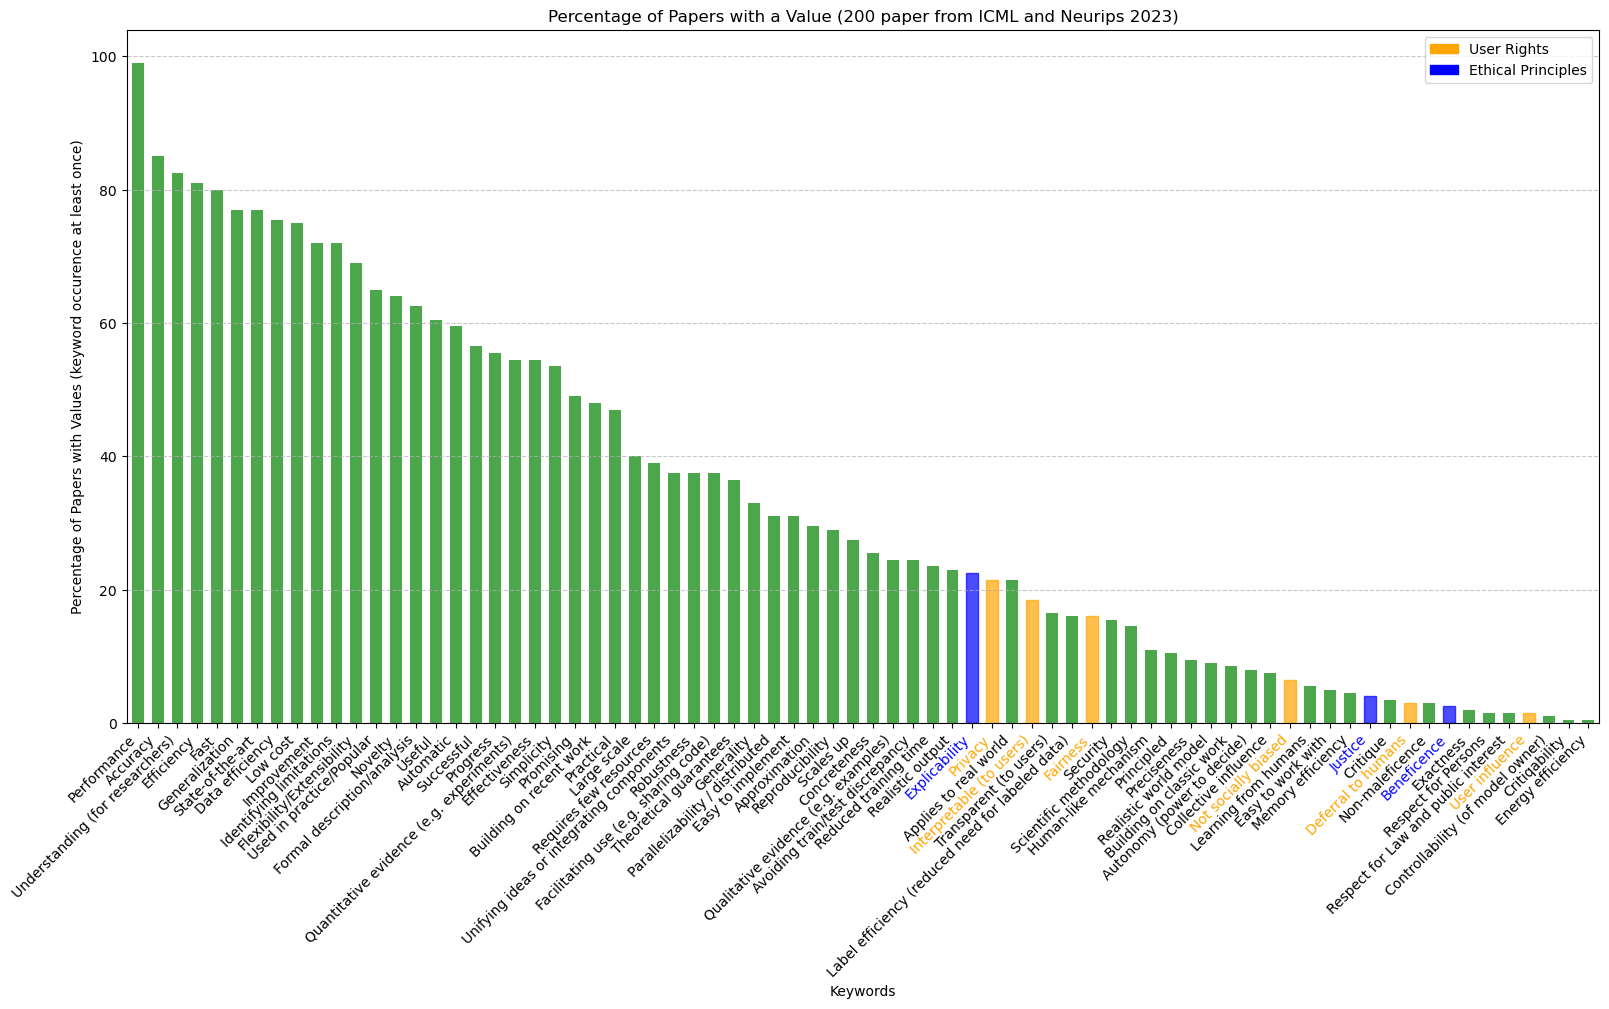

In [4]:
# Combine the two dataframes from both conferences 
combined_df = pd.concat([keyword_matrix_neurips, keyword_matrix_icml])

# Calculate the percentage of papers with a value for each keyword
percentage_with_value = (combined_df.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted = percentage_with_value.sort_values(ascending=False)

# Plot the percentages
plt.figure(figsize=(19, 9))
bars = percentage_with_value_sorted.plot(kind='bar', color='green', alpha=0.7, width=0.6)

# Highlight specific bars in orange for user rights
for keyword in highlight_keywords_user_rights:
    if keyword in percentage_with_value_sorted.index:
        bar = bars.patches[percentage_with_value_sorted.index.get_loc(keyword)]
        bar.set_color('orange')
        bar.set_alpha(0.7)
        bars.get_xticklabels()[percentage_with_value_sorted.index.get_loc(keyword)].set_color('orange')

# Highlight specific bars in blue for ethics
for keyword in highlight_keywords_ethics:
    if keyword in percentage_with_value_sorted.index:
        bar = bars.patches[percentage_with_value_sorted.index.get_loc(keyword)]
        bar.set_color('blue')
        bar.set_alpha(0.7)
        bars.get_xticklabels()[percentage_with_value_sorted.index.get_loc(keyword)].set_color('blue')

# Add legend
orange_patch = mpatches.Patch(color='orange', label='User Rights')
blue_patch = mpatches.Patch(color='blue', label='Ethical Principles')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Percentage of Papers with a Value (200 paper from ICML and Neurips 2023)')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers with Values (keyword occurence at least once)')
plt.xticks(rotation=45, ha = 'right')

# Apply theme with horizontal lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('plots/percentage_both_conferences.png', bbox_inches='tight', dpi=300)

plt.show()

In [5]:
# Get the subset of the dataframe to evaluate percentage of highlighted values 
subset_df = percentage_with_value_sorted[percentage_with_value_sorted.index.isin(highlight_keywords)]
subset_df

Explicability               22.5
Privacy                     21.5
Interpretable (to users)    18.5
Fairness                    16.0
Not socially biased          6.5
Justice                      4.0
Deferral to humans           3.0
Beneficence                  2.5
User influence               1.5
dtype: float64

In [6]:
# Calculate the percentage of papers with a value for each keyword for NeurIPS
percentage_with_value_neurips = (keyword_matrix_neurips.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_neurips = percentage_with_value_neurips.sort_values(ascending=False)

# Calculate the percentage of papers with a value for each keyword for ICML
percentage_with_value_icml = (keyword_matrix_icml.iloc[:, 1:] > 0).mean() * 100
percentage_with_value_sorted_icml = percentage_with_value_icml.sort_values(ascending=False)

In [16]:
percentage_with_value_sorted_neurips.head(10)

Performance                        98.0
Identifying limitations            88.0
Understanding (for researchers)    87.0
Data efficiency                    87.0
Accuracy                           85.0
Fast                               84.0
Low cost                           80.0
Efficiency                         79.0
State-of-the-art                   78.0
Automatic                          74.0
dtype: float64

In [17]:
percentage_with_value_sorted_icml.head(10)

Performance                        100.0
Accuracy                            85.0
Efficiency                          83.0
Generalization                      82.0
Understanding (for researchers)     78.0
Fast                                76.0
State-of-the-art                    76.0
Improvement                         73.0
Low cost                            70.0
Flexibility/Extensibility           66.0
dtype: float64

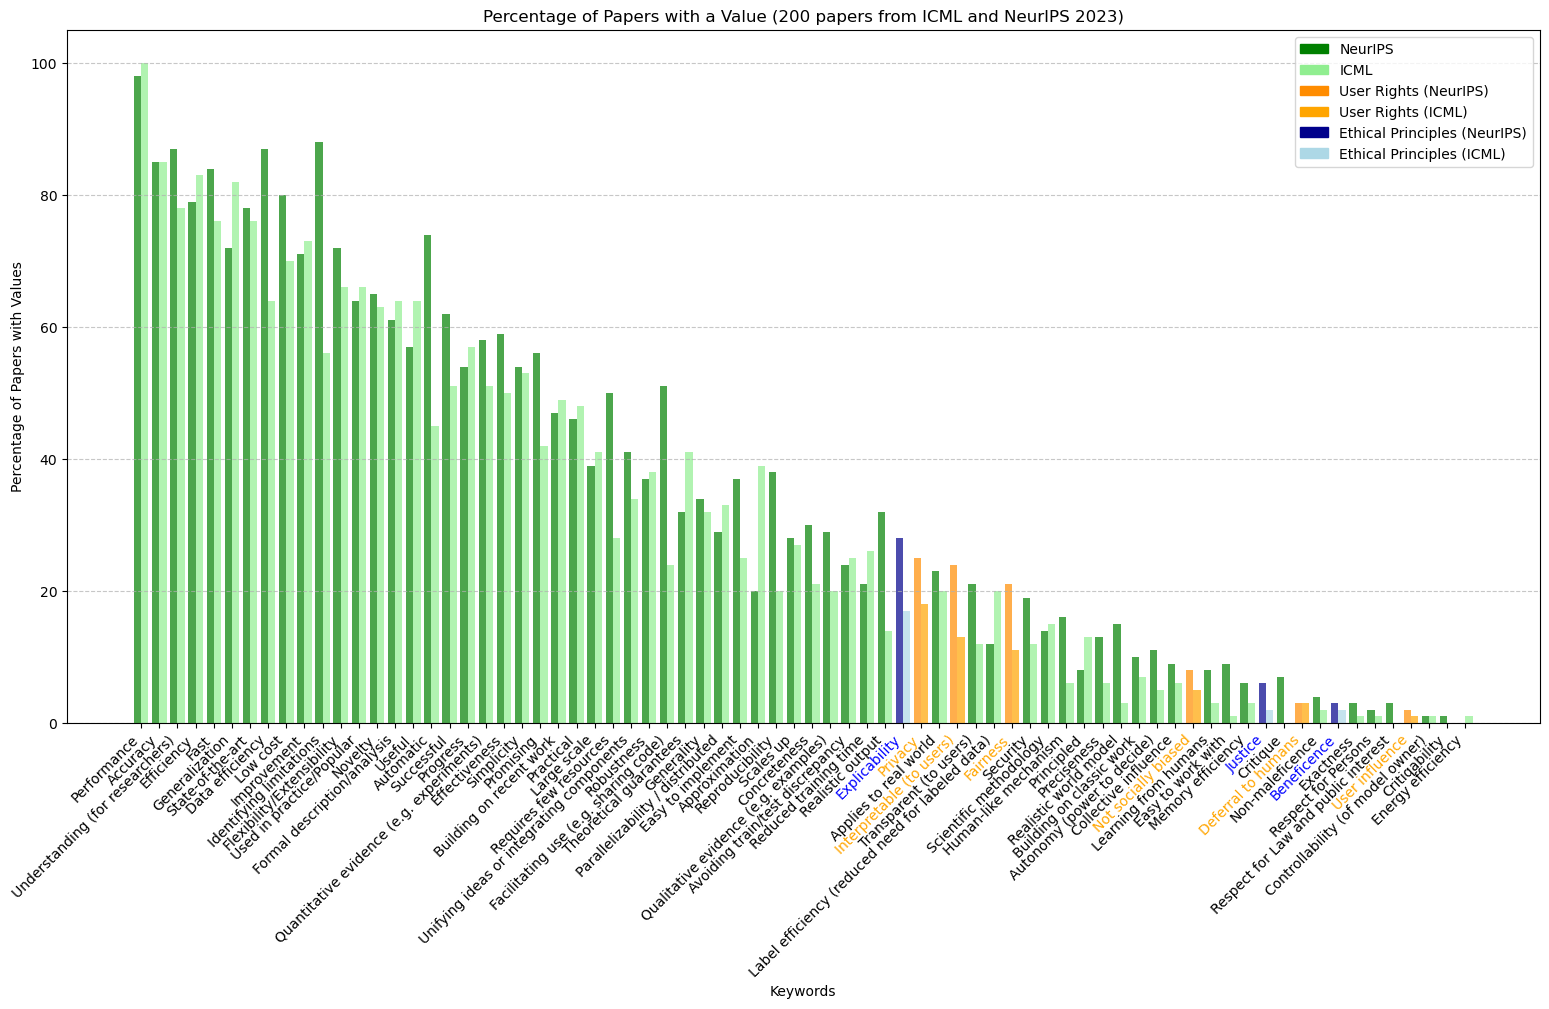

In [7]:
# Calculate the percentage of papers with a value for each keyword for NeurIPS
percentage_with_value_neurips = (keyword_matrix_neurips.iloc[:, 1:] > 0).mean() * 100

# Calculate the percentage of papers with a value for each keyword for ICML
percentage_with_value_icml = (keyword_matrix_icml.iloc[:, 1:] > 0).mean() * 100

# Align indexes and ensure both datasets have the same ordering
common_keywords = percentage_with_value_neurips.index.intersection(percentage_with_value_icml.index)
percentage_with_value_neurips = percentage_with_value_neurips.loc[common_keywords]
percentage_with_value_icml = percentage_with_value_icml.loc[common_keywords]

# Sort by the sum of both values to maintain consistent ordering
sorted_keywords = (percentage_with_value_neurips + percentage_with_value_icml).sort_values(ascending=False).index
percentage_with_value_neurips = percentage_with_value_neurips.loc[sorted_keywords]
percentage_with_value_icml = percentage_with_value_icml.loc[sorted_keywords]

# Define bar width and x-axis positions
bar_width = 0.4
x = np.arange(len(sorted_keywords))

# Create figure
plt.figure(figsize=(19, 9))

# Default colors
colors_neurips = ['green'] * len(sorted_keywords)
colors_icml = ['lightgreen'] * len(sorted_keywords)
xtick_colors = ['black'] * len(sorted_keywords)  # Default color for x-tick labels

# Highlight specific bars and change x-tick label color accordingly
for keyword in highlight_keywords_user_rights:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_neurips[idx] = 'darkorange'  # Dark orange for NeurIPS
        colors_icml[idx] = 'orange'         # Light orange for ICML
        xtick_colors[idx] = 'orange'        # Change x-tick label color

for keyword in highlight_keywords_ethics:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_neurips[idx] = 'darkblue'    # Dark blue for NeurIPS
        colors_icml[idx] = 'lightblue'      # Light blue for ICML
        xtick_colors[idx] = 'blue'          # Change x-tick label color

# Plot both bars next to each other for NeurIPS and ICML
bars_neurips = plt.bar(x - bar_width / 2, percentage_with_value_neurips, bar_width, color=colors_neurips, alpha=0.7, label='NeurIPS')
bars_icml = plt.bar(x + bar_width / 2, percentage_with_value_icml, bar_width, color=colors_icml, alpha=0.7, label='ICML')

# Add legend
legend_patches = [
    mpatches.Patch(color='green', label='NeurIPS'),
    mpatches.Patch(color='lightgreen', label='ICML'),
    mpatches.Patch(color='darkorange', label='User Rights (NeurIPS)'),
    mpatches.Patch(color='orange', label='User Rights (ICML)'),
    mpatches.Patch(color='darkblue', label='Ethical Principles (NeurIPS)'),
    mpatches.Patch(color='lightblue', label='Ethical Principles (ICML)'),
]
plt.legend(handles=legend_patches)

# Formatting
plt.title('Percentage of Papers with a Value (200 papers from ICML and NeurIPS 2023)')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers with Values')

# Rotate x-ticks and apply individual colors
xticks = plt.xticks(x, sorted_keywords, rotation=45, ha='right')
for tick, color in zip(xticks[1], xtick_colors):
    tick.set_color(color)  # Apply color to each tick label

# Apply theme with horizontal lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('plots/percentage_comparison_conferences.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


In [8]:
# Read tin the data from the Brihane Paper 
values_df = pd.read_csv('values.csv')

# Merge values_df with percentage_with_value
merged_df = values_df.merge(percentage_with_value.reset_index(), left_on='Value', right_on='index')
merged_df.drop('index', axis=1, inplace=True)

# rename columns to value, birhane percentage and percentage 2023
merged_df.columns = ['Value', 'Birhane Percentage', 'Percentage 2023']
merged_df.head(5)

,Value,Birhane Percentage,Percentage 2023
0,Performance,96.0,99.0
1,Generalization,89.0,77.0
2,Quantitative evidence (e.g. experiments),85.0,54.5
3,Efficiency,84.0,81.0
4,Novelty,77.0,64.0


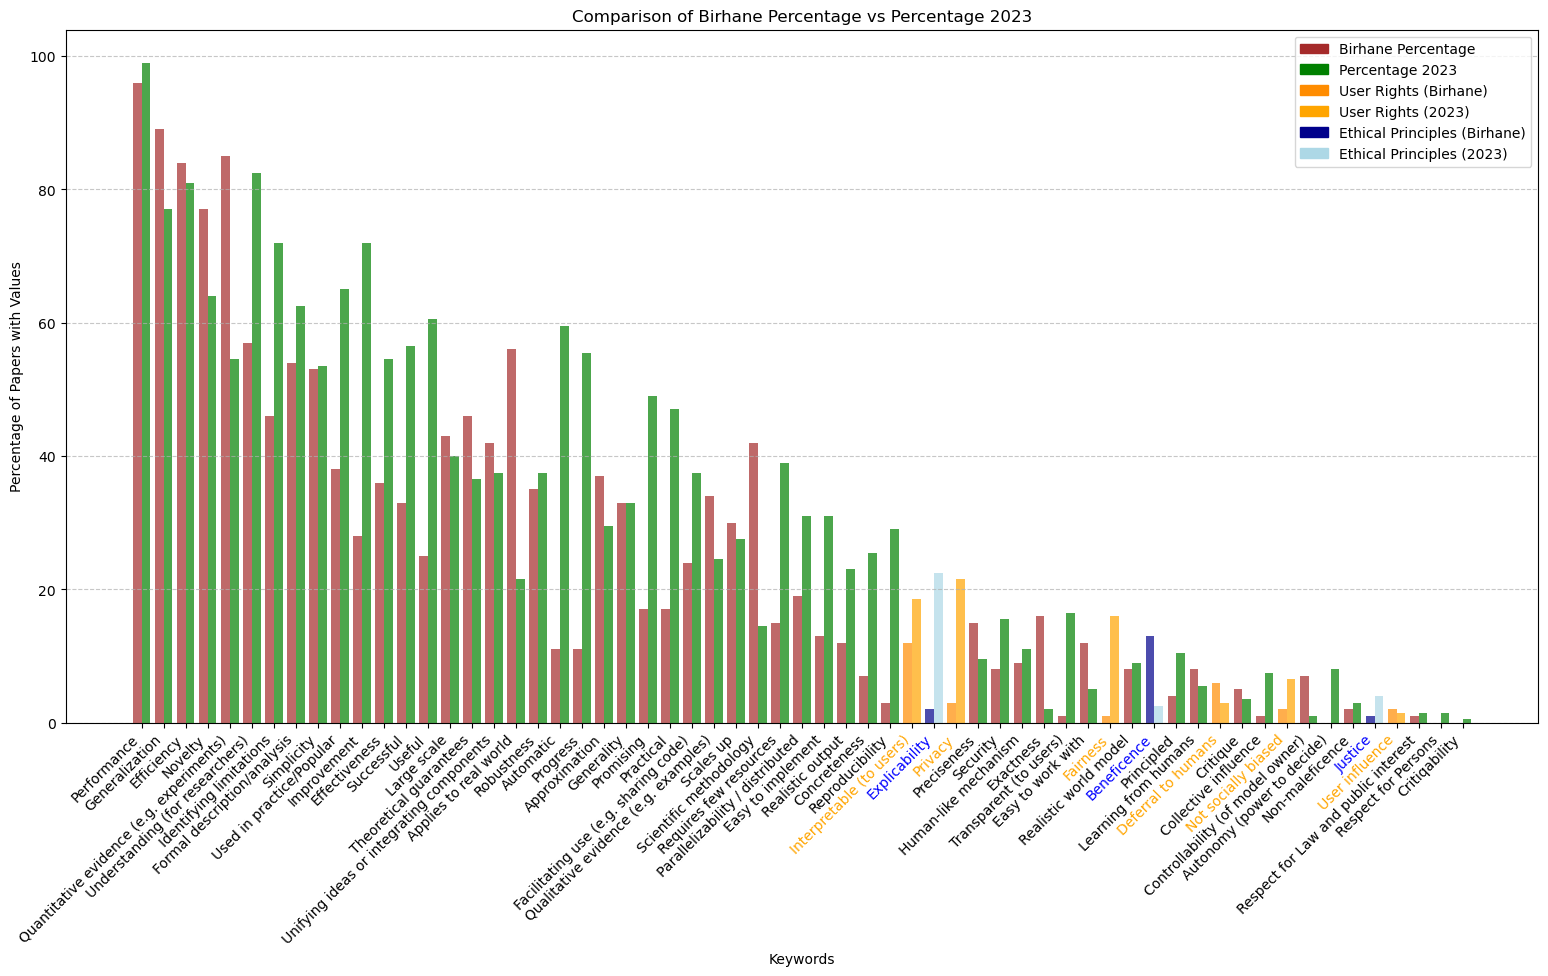

In [9]:
# Extract relevant data
percentage_birhane = merged_df.set_index('Value')['Birhane Percentage']
percentage_2023 = merged_df.set_index('Value')['Percentage 2023']

# Ensure both datasets have the same ordering
sorted_keywords = (percentage_birhane + percentage_2023).sort_values(ascending=False).index
percentage_birhane = percentage_birhane.loc[sorted_keywords]
percentage_2023 = percentage_2023.loc[sorted_keywords]

# Define bar width and x-axis positions
bar_width = 0.4
x = np.arange(len(sorted_keywords))

# Create figure
plt.figure(figsize=(19, 9))

# Default colors
colors_birhane = ['brown'] * len(sorted_keywords)  # Default color for Birhane
colors_2023 = ['green'] * len(sorted_keywords)  # Default color for 2023
xtick_colors = ['black'] * len(sorted_keywords)  # Default x-tick color

# Highlight specific bars and adjust x-tick colors
for keyword in highlight_keywords_user_rights:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_birhane[idx] = 'darkorange'  # Dark orange for Birhane
        colors_2023[idx] = 'orange'         # Light orange for 2023
        xtick_colors[idx] = 'orange'        # Change x-tick label color

for keyword in highlight_keywords_ethics:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_birhane[idx] = 'darkblue'    # Dark blue for Birhane
        colors_2023[idx] = 'lightblue'      # Light blue for 2023
        xtick_colors[idx] = 'blue'          # Change x-tick label color

# Plot both bars next to each other for Birhane and 2023
bars_birhane = plt.bar(x - bar_width / 2, percentage_birhane, bar_width, color=colors_birhane, alpha=0.7, label='Birhane')
bars_2023 = plt.bar(x + bar_width / 2, percentage_2023, bar_width, color=colors_2023, alpha=0.7, label='Percentage 2023')

# Add legend
legend_patches = [
    mpatches.Patch(color='brown', label='Birhane Percentage'),
    mpatches.Patch(color='green', label='Percentage 2023'),
    mpatches.Patch(color='darkorange', label='User Rights (Birhane)'),
    mpatches.Patch(color='orange', label='User Rights (2023)'),
    mpatches.Patch(color='darkblue', label='Ethical Principles (Birhane)'),
    mpatches.Patch(color='lightblue', label='Ethical Principles (2023)'),
]
plt.legend(handles=legend_patches)

# Formatting
plt.title('Comparison of Birhane Percentage vs Percentage 2023')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers with Values')

# Rotate x-ticks and apply individual colors
xticks = plt.xticks(x, sorted_keywords, rotation=45, ha='right')
for tick, color in zip(xticks[1], xtick_colors):
    tick.set_color(color)  # Apply color to each tick label

# Apply theme with horizontal lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('plots/percentage_comparison_brihane.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

In [10]:
subset_melted_df = merged_df[merged_df['Value'].isin(highlight_keywords)]
subset_melted_df

,Value,Birhane Percentage,Percentage 2023
32,Beneficence,13.0,2.5
33,Interpretable (to users),12.0,18.5
44,Deferral to humans,6.0,3.0
47,Privacy,3.0,21.5
49,Explicability,2.0,22.5
50,User influence,2.0,1.5
52,Not socially biased,2.0,6.5
54,Justice,1.0,4.0
56,Fairness,1.0,16.0


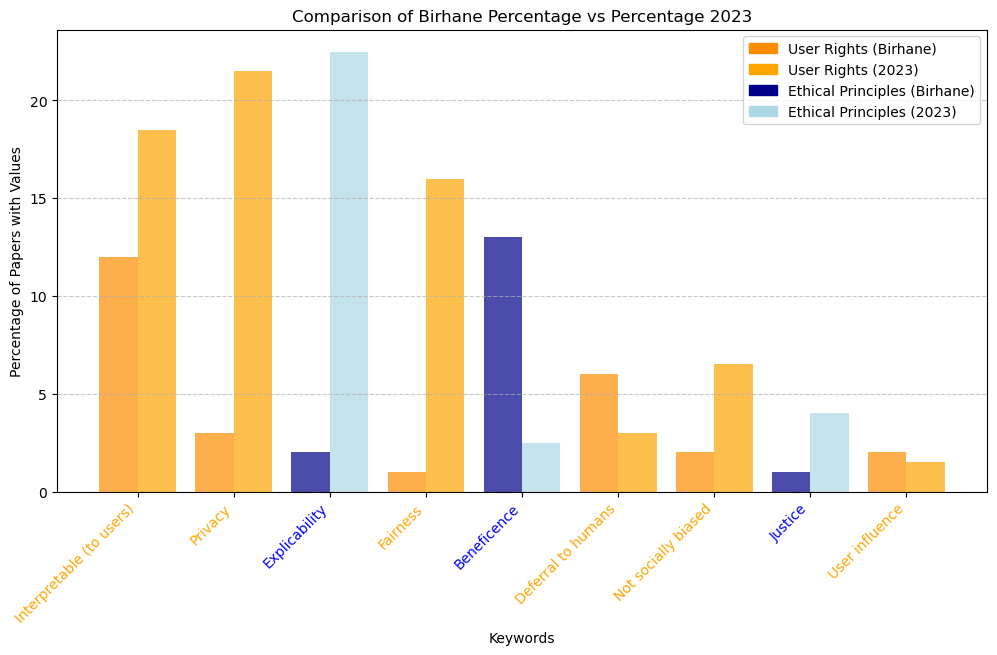

In [12]:
# Ensure subset_melted_df has the correct columns
subset_melted_df.columns = ['Value', 'Birhane Percentage', 'Percentage 2023']

# Extract relevant data
percentage_birhane = subset_melted_df.set_index('Value')['Birhane Percentage']
percentage_2023 = subset_melted_df.set_index('Value')['Percentage 2023']

# Ensure both datasets have the same ordering
sorted_keywords = (percentage_birhane + percentage_2023).sort_values(ascending=False).index
percentage_birhane = percentage_birhane.loc[sorted_keywords]
percentage_2023 = percentage_2023.loc[sorted_keywords]

# Define bar width and x-axis positions
bar_width = 0.4
x = np.arange(len(sorted_keywords))

# Create figure
plt.figure(figsize=(12, 6))

# Highlight specific bars based on user rights and ethics
for keyword in highlight_keywords_user_rights:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_birhane[idx] = 'darkorange'  # Dark orange for Birhane
        colors_2023[idx] = 'orange'         # Light orange for 2023
        xtick_colors[idx] = 'orange'        # Change x-tick label color

for keyword in highlight_keywords_ethics:
    if keyword in sorted_keywords:
        idx = sorted_keywords.get_loc(keyword)
        colors_birhane[idx] = 'darkblue'    # Dark blue for Birhane
        colors_2023[idx] = 'lightblue'      # Light blue for 2023
        xtick_colors[idx] = 'blue'          # Change x-tick label color

# Plot both bars next to each other for Birhane and 2023
bars_birhane = plt.bar(x - bar_width / 2, percentage_birhane, bar_width, color=colors_birhane, alpha=0.7, label='Birhane')
bars_2023 = plt.bar(x + bar_width / 2, percentage_2023, bar_width, color=colors_2023, alpha=0.7, label='Percentage 2023')

# Add legend
legend_patches = [
    mpatches.Patch(color='darkorange', label='User Rights (Birhane)'),
    mpatches.Patch(color='orange', label='User Rights (2023)'),
    mpatches.Patch(color='darkblue', label='Ethical Principles (Birhane)'),
    mpatches.Patch(color='lightblue', label='Ethical Principles (2023)'),
]
plt.legend(handles=legend_patches)

# Formatting
plt.title('Comparison of Birhane Percentage vs Percentage 2023')
plt.xlabel('Keywords')
plt.ylabel('Percentage of Papers with Values')

# Rotate x-ticks and apply individual colors
xticks = plt.xticks(x, sorted_keywords, rotation=45, ha='right')
for tick, color in zip(xticks[1], xtick_colors):
    tick.set_color(color)  # Apply color to each tick label

# Apply theme with horizontal lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('plots/subset_percentage_comparison.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()

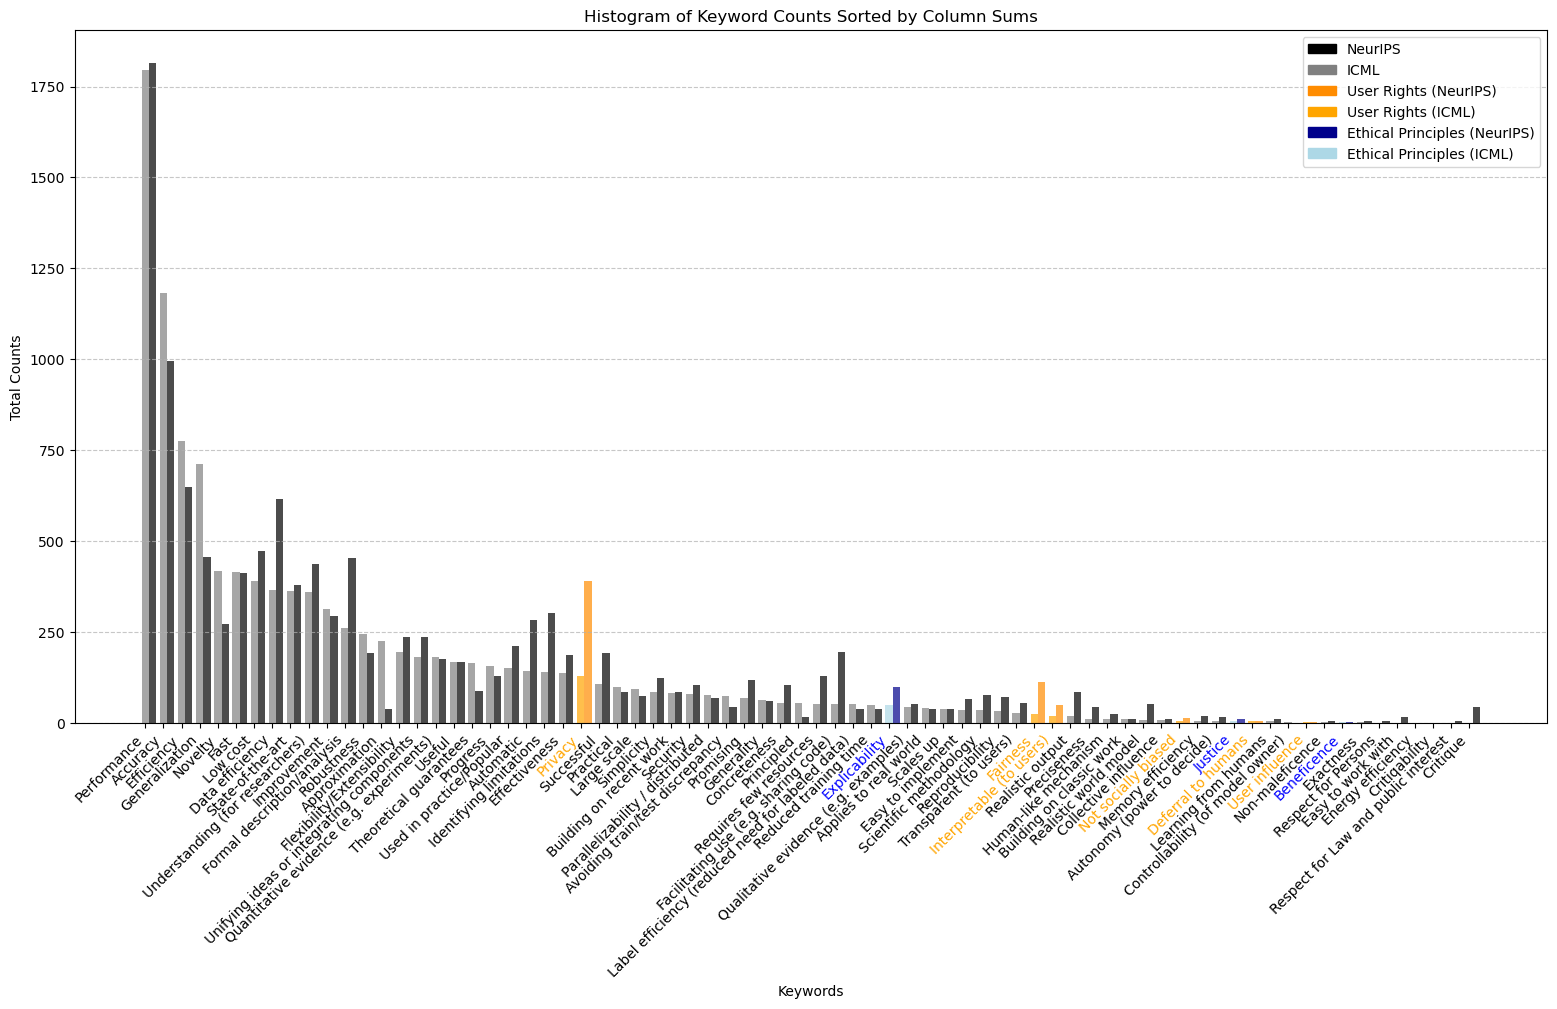

In [13]:
# Calculate the column sums
column_sums_icml = keyword_matrix_icml.iloc[:, 1:].sum().sort_values(ascending=False)
column_sums_neurips = keyword_matrix_neurips.iloc[:, 1:].sum().sort_values(ascending=False)

# Ensure alignment of both datasets
common_keywords = column_sums_icml.index.intersection(column_sums_neurips.index)
column_sums_icml = column_sums_icml.loc[common_keywords]
column_sums_neurips = column_sums_neurips.loc[common_keywords]

# Define bar width and positions
width = 0.4  # Width of bars
positions_icml = np.arange(len(common_keywords))
positions_neurips = positions_icml + width  # Offset for NeurIPS bars

# Default colors
colors_icml = ['grey'] * len(common_keywords)  # Default ICML color
colors_neurips = ['black'] * len(common_keywords)  # Default NeurIPS color
xtick_colors = ['black'] * len(common_keywords)  # Default x-tick color

# Highlight specific bars based on keyword categories
for keyword in highlight_keywords_user_rights:
    if keyword in common_keywords:
        idx = common_keywords.get_loc(keyword)
        colors_icml[idx] = 'orange'  # Highlight ICML bar
        colors_neurips[idx] = 'darkorange'  # Highlight NeurIPS bar
        xtick_colors[idx] = 'orange'  # Color x-tick label

for keyword in highlight_keywords_ethics:
    if keyword in common_keywords:
        idx = common_keywords.get_loc(keyword)
        colors_icml[idx] = 'lightblue'  # Highlight ICML bar
        colors_neurips[idx] = 'darkblue'  # Highlight NeurIPS bar
        xtick_colors[idx] = 'blue'  # Color x-tick label

# Create figure
plt.figure(figsize=(19, 9))

# Plot bars for ICML and NeurIPS
bars_icml = plt.bar(positions_icml, column_sums_icml, width=width, label='ICML', color=colors_icml, alpha=0.7)
bars_neurips = plt.bar(positions_neurips, column_sums_neurips, width=width, label='NeurIPS', color=colors_neurips, alpha=0.7)

# Add legend
legend_patches = [
    plt.Rectangle((0, 0), 1, 1, color='black', label='NeurIPS'),
    plt.Rectangle((0, 0), 1, 1, color='grey', label='ICML'),
    plt.Rectangle((0, 0), 1, 1, color='darkorange', label='User Rights (NeurIPS)'),
    plt.Rectangle((0, 0), 1, 1, color='orange', label='User Rights (ICML)'),
    plt.Rectangle((0, 0), 1, 1, color='darkblue', label='Ethical Principles (NeurIPS)'),
    plt.Rectangle((0, 0), 1, 1, color='lightblue', label='Ethical Principles (ICML)'),
]
plt.legend(handles=legend_patches)

# Formatting
plt.title('Histogram of Keyword Counts Sorted by Column Sums')
plt.xlabel('Keywords')
plt.ylabel('Total Counts')

# Rotate x-ticks and apply individual colors
xticks = plt.xticks(positions_icml, common_keywords, rotation=45, ha='right')
for tick, color in zip(xticks[1], xtick_colors):
    tick.set_color(color)  # Apply color to each tick label

# Apply grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show plot
plt.savefig('plots/histogram_keyword_counts_total_number.png', bbox_inches='tight', dpi=300)
plt.show()
